ANALYSE DU PIB MONDIAL 2024

PIB total des 10 pays : 72,939 milliards $
PIB moyen : 7,294 milliards $
Taux de croissance moyen : 1.65%

TOP 5 PAYS PAR PIB EN 2024
      Pays  PIB_milliards_$  Part_PIB_mondial_%  Croissance_%
Etats-Unis            26185               35.90           2.1
     Chine            21643               29.67           4.7
     Japon             4365                5.98           1.0
 Allemagne             4120                5.65           0.3
      Inde             3820                5.24           6.2

ANALYSES SPÉCIFIQUES

✓ Croissance la plus élevée : Inde (6.2%)

✗ Croissance négative : Russie (-1.8%)

• Part USA + Chine : 65.6% du PIB des 10 pays


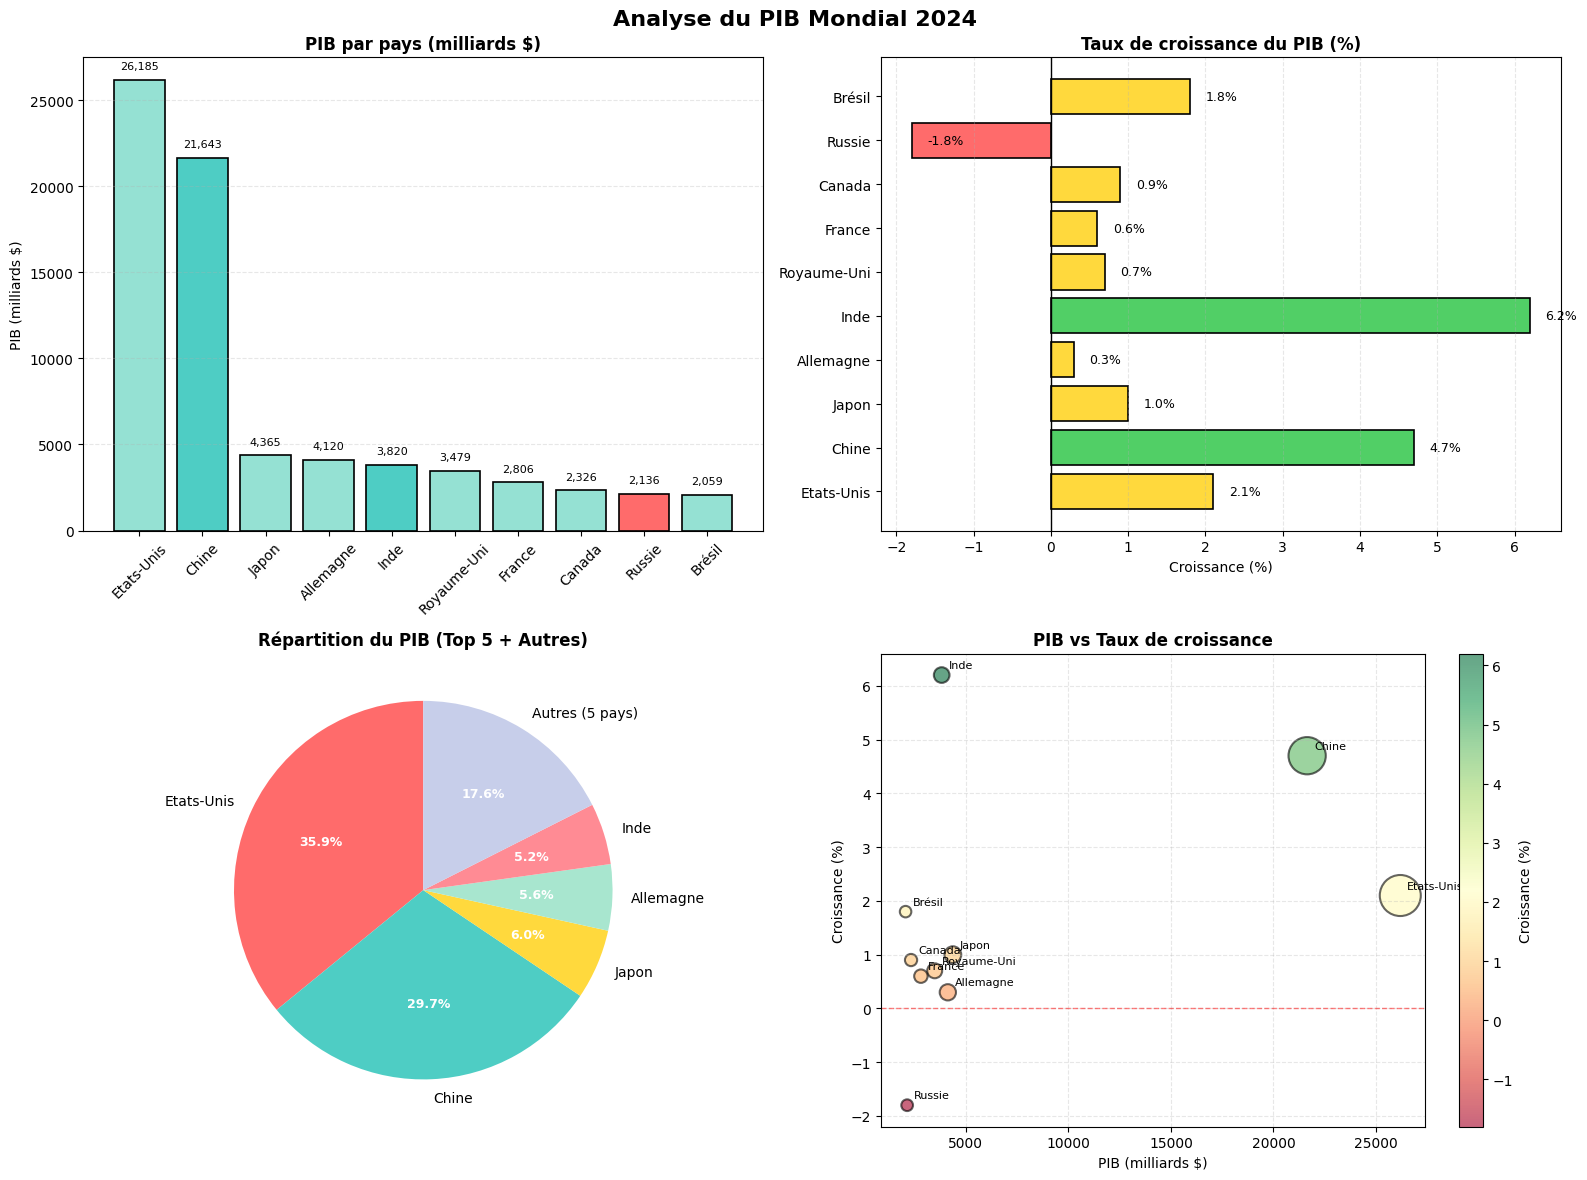

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Données PIB 2024 extraites des sources recensées
data = {
    "Pays": ["Etats-Unis", "Chine", "Japon", "Allemagne", "Inde",
             "Royaume-Uni", "France", "Canada", "Russie", "Brésil"],
    "PIB_milliards_$": [26185, 21643, 4365, 4120, 3820, 3479, 2806, 2326, 2136, 2059],
    "Croissance_%": [2.10, 4.70, 1.00, 0.30, 6.20, 0.70, 0.60, 0.90, -1.80, 1.80]
}

# Création d'un DataFrame
df = pd.DataFrame(data)

# Calcul de statistiques additionnelles
df['PIB_2023_milliards_$'] = df['PIB_milliards_$'] / (1 + df['Croissance_%'] / 100)
df['Part_PIB_mondial_%'] = (df['PIB_milliards_$'] / df['PIB_milliards_$'].sum() * 100).round(2)

# Affichage des statistiques générales
print("=" * 80)
print("ANALYSE DU PIB MONDIAL 2024")
print("=" * 80)
print(f"\nPIB total des 10 pays : {df['PIB_milliards_$'].sum():,.0f} milliards $")
print(f"PIB moyen : {df['PIB_milliards_$'].mean():,.0f} milliards $")
print(f"Taux de croissance moyen : {df['Croissance_%'].mean():.2f}%")

print("\n" + "=" * 80)
print("TOP 5 PAYS PAR PIB EN 2024")
print("=" * 80)
print(df[['Pays', 'PIB_milliards_$', 'Part_PIB_mondial_%', 'Croissance_%']].head().to_string(index=False))

# Analyses spécifiques
print("\n" + "=" * 80)
print("ANALYSES SPÉCIFIQUES")
print("=" * 80)

# Pays avec la croissance la plus forte
pays_croissance_max = df.loc[df['Croissance_%'].idxmax()]
print(f"\n✓ Croissance la plus élevée : {pays_croissance_max['Pays']} ({pays_croissance_max['Croissance_%']}%)")

# Pays avec croissance négative
pays_croissance_neg = df[df['Croissance_%'] < 0]
if not pays_croissance_neg.empty:
    print(f"\n✗ Croissance négative : {pays_croissance_neg['Pays'].values[0]} ({pays_croissance_neg['Croissance_%'].values[0]}%)")
else:
    print("\n✓ Aucun pays n'a une croissance négative")

# Part des USA et Chine dans le PIB total
part_usa_chine = df[df['Pays'].isin(['Etats-Unis', 'Chine'])]['Part_PIB_mondial_%'].sum()
print(f"\n• Part USA + Chine : {part_usa_chine:.1f}% du PIB des 10 pays")

# Visualisations améliorées
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Analyse du PIB Mondial 2024', fontsize=16, fontweight='bold')

# 1. PIB par pays (graphique en barres)
colors = ['#ff6b6b' if x < 0 else '#4ecdc4' if x > 4 else '#95e1d3' for x in df['Croissance_%']]
axes[0, 0].bar(df['Pays'], df['PIB_milliards_$'], color=colors, edgecolor='black', linewidth=1.2)
axes[0, 0].set_title('PIB par pays (milliards $)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('PIB (milliards $)', fontsize=10)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3, linestyle='--')
for i, v in enumerate(df['PIB_milliards_$']):
    axes[0, 0].text(i, v + 500, f'{v:,.0f}', ha='center', va='bottom', fontsize=8)

# 2. Taux de croissance (graphique en barres horizontales)
colors_growth = ['#ff6b6b' if x < 0 else '#51cf66' if x > 4 else '#ffd93d' for x in df['Croissance_%']]
axes[0, 1].barh(df['Pays'], df['Croissance_%'], color=colors_growth, edgecolor='black', linewidth=1.2)
axes[0, 1].set_title('Taux de croissance du PIB (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Croissance (%)', fontsize=10)
axes[0, 1].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[0, 1].grid(axis='x', alpha=0.3, linestyle='--')
for i, v in enumerate(df['Croissance_%']):
    axes[0, 1].text(v + 0.2, i, f'{v}%', va='center', fontsize=9)

# 3. Part du PIB mondial (camembert)
top5 = df.nlargest(5, 'PIB_milliards_$')
autres = pd.DataFrame({'Pays': ['Autres (5 pays)'],
                       'PIB_milliards_$': [df.iloc[5:]['PIB_milliards_$'].sum()]})
pie_data = pd.concat([top5[['Pays', 'PIB_milliards_$']], autres])
colors_pie = ['#ff6b6b', '#4ecdc4', '#ffd93d', '#a8e6cf', '#ff8b94', '#c7ceea']
wedges, texts, autotexts = axes[1, 0].pie(pie_data['PIB_milliards_$'],
                                            labels=pie_data['Pays'],
                                            autopct='%1.1f%%',
                                            colors=colors_pie,
                                            startangle=90)
axes[1, 0].set_title('Répartition du PIB (Top 5 + Autres)', fontsize=12, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(9)
    autotext.set_fontweight('bold')

# 4. Relation PIB vs Croissance (nuage de points)
scatter = axes[1, 1].scatter(df['PIB_milliards_$'], df['Croissance_%'],
                             s=df['PIB_milliards_$']/30, c=df['Croissance_%'],
                             cmap='RdYlGn', alpha=0.6, edgecolors='black', linewidth=1.5)
axes[1, 1].set_title('PIB vs Taux de croissance', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('PIB (milliards $)', fontsize=10)
axes[1, 1].set_ylabel('Croissance (%)', fontsize=10)
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[1, 1].grid(True, alpha=0.3, linestyle='--')
for i, row in df.iterrows():
    axes[1, 1].annotate(row['Pays'], (row['PIB_milliards_$'], row['Croissance_%']),
                       xytext=(5, 5), textcoords='offset points', fontsize=8)
plt.colorbar(scatter, ax=axes[1, 1], label='Croissance (%)')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)